# Phase 4: Model Training & Evaluation
## Titanic Survival Prediction

**Goal:** Train multiple ML models, evaluate performance, and select the best one

**Models We'll Try:**
1. Logistic Regression (baseline)
2. Decision Tree (single tree)
3. Random Forest (ensemble of trees)
4. XGBoost (gradient boosting)
5. K-Nearest Neighbors (KNN)
6. Support Vector Machine (SVM)
7. Naive Bayes

**Workflow for Each Model:**
- Understand the algorithm (how it works)
- Train the model
- Make predictions
- Evaluate performance
- Compare with others

---
## 1. Setup and Load Data

In [59]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [60]:
# Load engineered data from Phase 3

df=pd.read_csv('../data/train_engineered.csv')
print(df.head())
print(df.shape)

   Unnamed: 0  Survived  Pclass  Sex  HasCabin  FamilySize  IsAlone  \
0           0         0       3    1         0           2        0   
1           1         1       1    0         1           2        0   
2           2         1       3    0         0           1        1   
3           3         1       1    0         1           2        0   
4           4         0       3    1         0           1        1   

   Title_Master  Title_Miss  Title_Mr  ...  AgeGroup_Child  AgeGroup_Teen  \
0             0           0         1  ...               0              0   
1             0           0         0  ...               0              0   
2             0           1         0  ...               0              0   
3             0           0         0  ...               0              0   
4             0           0         1  ...               0              0   

   AgeGroup_Adult  AgeGroup_Senior  FareGroup_Low  FareGroup_Medium  \
0               1                0     

---
## 2. Split Data: Train vs Test Sets





In [61]:
# Separate features (X) and target (y)
x=df.drop(columns='Survived')
y=df['Survived']

In [62]:
# Split into train and test sets (80/20 split)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

---
## 3. Model Performance Tracker

We'll store each model's accuracy here to compare them all at the end!

In [63]:
# Dictionary to store model results
model_results = {}

---
---
# MODEL 1: LOGISTIC REGRESSION



In [64]:
from sklearn.linear_model import LogisticRegression

In [105]:

model=LogisticRegression(random_state=42,max_iter=100)
model.fit(x_train,y_train)
y_pred_log=model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)
acc_log=accuracy_score(y_test,y_pred_log)
print(f"the accuracy is :{acc_log:.4f}")


the accuracy is :0.8492


              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.81      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179


Confusion Matrix:


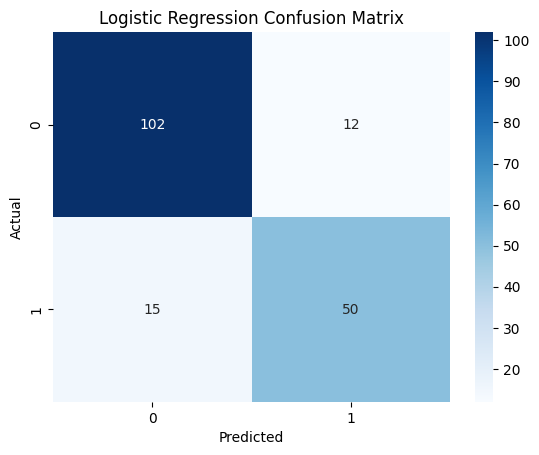

In [66]:
print(classification_report(y_test,y_pred_log))
print("\nConfusion Matrix:")
cm=confusion_matrix(y_test,y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [67]:
model_results['Logistic Regression']=acc_log

---
---
# MODEL 2: DECISION TREE




In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree=DecisionTreeClassifier(max_depth=4,random_state=42)
tree.fit(x_train,y_train)
y_pred_tree=tree.predict(x_test)
y_pred_proba_tree=tree.predict_proba(x_test)

In [70]:
acc_tree=accuracy_score(y_test,y_pred_tree)
print(f"Accuracy for decision trees is {acc_tree} ")
print(classification_report(y_test,y_pred_tree))

Accuracy for decision trees is 0.8212290502793296 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       114
           1       0.79      0.69      0.74        65

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [71]:
model_results['Descison Tree']=acc_tree

---
---
# MODEL 3: RANDOM FOREST


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
rf_acc=accuracy_score(y_test,y_pred_rf)
print(rf_acc)


0.8324022346368715


In [74]:

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.80      0.72      0.76        65

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



            features  importance
2                Sex    0.255371
8           Title_Mr    0.201442
1             Pclass    0.112587
4         FamilySize    0.067968
3           HasCabin    0.062258
7         Title_Miss    0.054547
0         Unnamed: 0    0.054046
9          Title_Mrs    0.050410
17    FareGroup_High    0.024617
6       Title_Master    0.015249
20        Embarked_S    0.014996
15     FareGroup_Low    0.013585
11    AgeGroup_Child    0.013328
16  FareGroup_Medium    0.012515
13    AgeGroup_Adult    0.011662
5            IsAlone    0.010689
18        Embarked_C    0.010525
19        Embarked_Q    0.005666
10        Title_Rare    0.004190
14   AgeGroup_Senior    0.003109
12     AgeGroup_Teen    0.001238


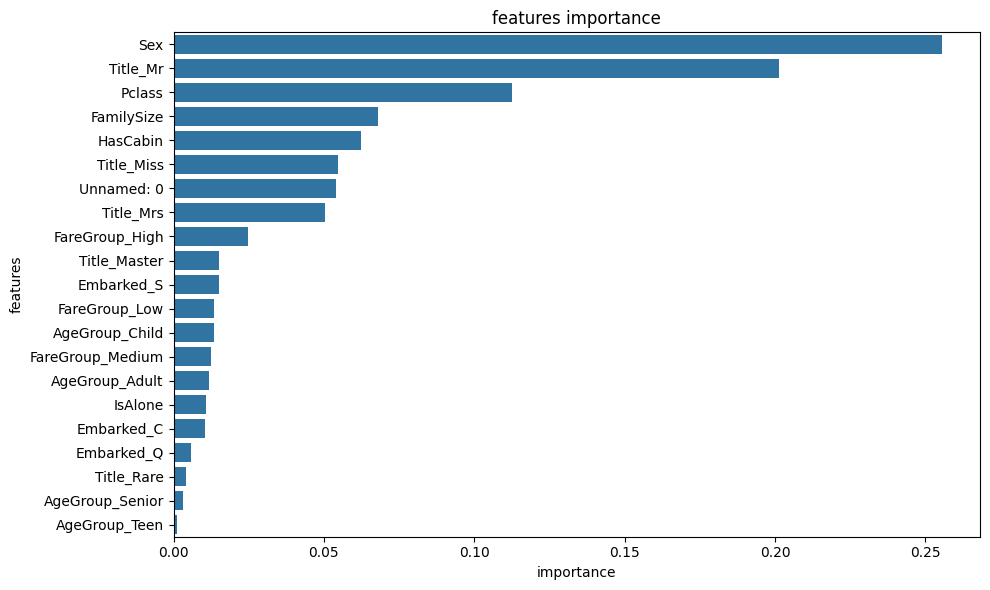

In [75]:
importance = pd.DataFrame({'features':x_train.columns,'importance':rf.feature_importances_}).sort_values('importance',ascending=False)
print(importance)

plt.figure(figsize=(10,6))
sns.barplot(data=importance,x='importance',y='features')
plt.title("features importance")
plt.tight_layout()
plt.show()

In [76]:
model_results["Random Forest"] = rf_acc

---
---
# MODEL 4: XGBOOST

**🎯 STOP HERE - Ask for explanation before coding!**

**Note:** Requires installation: `pip install xgboost`

In [77]:
import xgboost as xgb
from xgboost import XGBClassifier


In [78]:
# Create and train model
# Your code here (after explanation):
xgb_model=xgb.XGBClassifier(
    n_estimators=200,           
    max_depth=4,                
    learning_rate=0.05,         
    subsample=0.8,              
    colsample_bytree=0.8,       
    reg_alpha=0.5,              
    reg_lambda=1.0,            
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)
acc_xgb=accuracy_score(y_test,y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")

XGBoost Accuracy: 0.8268


In [79]:

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       114
           1       0.77      0.74      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [80]:

model_results['XGBoost'] = acc_xgb

---
---
# MODEL 5: K-NEAREST NEIGHBORS (KNN)


In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# Create and train model
# Your code here (after explanation):
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_scaled,y_train)
y_pred_knn=knn_model.predict(x_test_scaled)
acc_knn=accuracy_score(y_test,y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.4f}")


KNN Accuracy: 0.7654


In [83]:

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       114
           1       0.69      0.63      0.66        65

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.77      0.76       179



In [84]:

model_results['KNN'] = acc_knn

---
---
# MODEL 6: SUPPORT VECTOR MACHINE (SVM)


In [85]:
from sklearn.svm import SVC

In [86]:
# Create and train model
# Your code here (after explanation):
model_svm=SVC(kernel='rbf',random_state=42)
model_svm.fit(x_train_scaled,y_train)
y_pred_svm=model_svm.predict(x_test_scaled)
acc_svm=accuracy_score(y_test,y_pred_svm)
print(f'Svm accuracy is {acc_svm:.4f}')


Svm accuracy is 0.8268


In [87]:

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       114
           1       0.80      0.69      0.74        65

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [88]:

model_results['SVM'] = acc_svm

---
---
# MODEL 7: NAIVE BAYES

In [89]:

from sklearn.naive_bayes import GaussianNB


In [90]:

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")

Naive Bayes Accuracy: 0.7374


In [91]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       114
           1       0.61      0.77      0.68        65

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.76      0.74      0.74       179



In [92]:
model_results['Naive Bayes'] = acc_nb

---
---
# 🏆 FINAL COMPARISON: Which Model Won?

Compare all models side-by-side!

In [93]:

results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)

print(results_df.to_string(index=False))


              Model  Accuracy
Logistic Regression  0.849162
      Random Forest  0.832402
            XGBoost  0.826816
                SVM  0.826816
      Descison Tree  0.821229
                KNN  0.765363
        Naive Bayes  0.737430


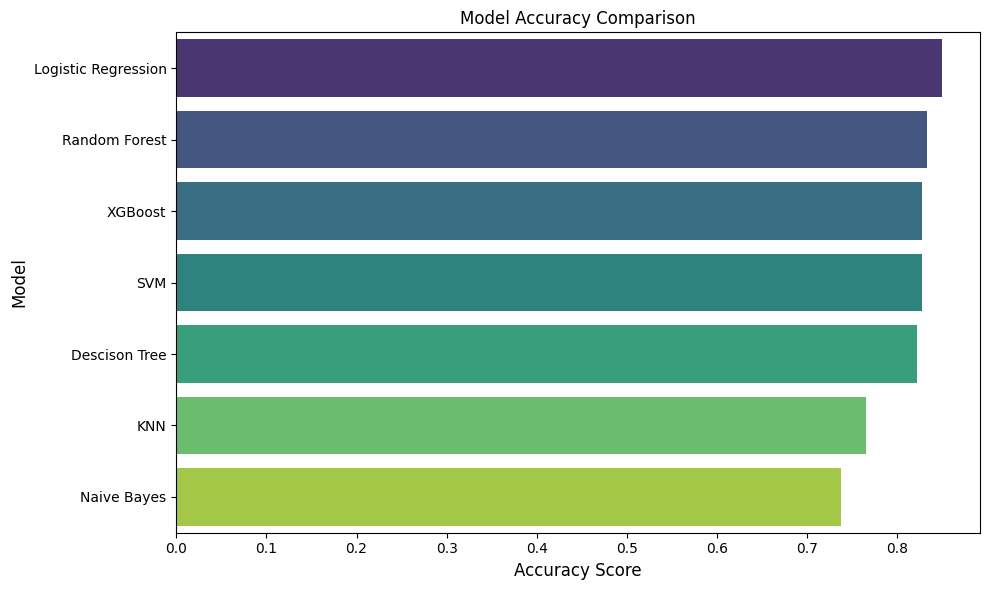

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df,x='Accuracy',y='Model',palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()


---
---
# 🔧 PHASE 5: HYPERPARAMETER TUNING

**Goal:** Fine-tune the best models to squeeze out extra accuracy

We'll focus on the best performers: Random Forest and XGBoost

## Random Forest Hyperparameters Explained

| Parameter | Range | What it Does | Too Low | Too High |
|-----------|-------|------------|---------|----------|
| **n_estimators** | 10-500 | Number of trees | Underfitting | Slow, memory |
| **max_depth** | 3-30 | Tree depth | Underfitting | Overfitting |
| **min_samples_split** | 2-50 | Min samples to split | Overfitting | Underfitting |
| **min_samples_leaf** | 1-20 | Min samples in leaf | Overfitting | Underfitting |

### How Each Parameter Affects Performance

#### n_estimators (Number of Trees)
```
100 trees:  Each tree averages out errors → More stable
300 trees:  Better averaging → More accurate (but slower)
1000 trees: Diminishing returns → Not much better
```

#### max_depth (How Deep Each Tree Can Grow)
```
max_depth=3:   Trees too simple → Underfitting (78% accuracy)
max_depth=8:   Balanced → Good accuracy (83% accuracy) ✓
max_depth=30:  Trees memorize data → Overfitting (79% accuracy)
```

#### min_samples_split (Minimum Samples to Split a Node)
```
min_samples_split=2:   Very aggressive splitting → Overfitting
min_samples_split=10:  Conservative → Better generalization ✓
min_samples_split=50:  Too conservative → Underfitting
```

#### min_samples_leaf (Minimum Samples in Final Leaf)
```
min_samples_leaf=1:   Any leaf can have 1 sample → Overfitting
min_samples_leaf=4:   Balanced → Good ✓
min_samples_leaf=10:  Too restrictive → May underfit
```

In [97]:
from  sklearn.model_selection import GridSearchCV
param_grid_rf={
    'n_estimators':[100,200,300],
    'max_depth':[5,8,10,12],
    'min_samples_split':[5,10,15],
    'min_samples_leaf':[2,4,6]
}
base_rf=RandomForestClassifier(random_state=42)

grid_search_rf=GridSearchCV(base_rf,param_grid_rf,cv=5,n_jobs=1,verbose=0)

grid_search_rf.fit(x_train,y_train)

print(grid_search_rf.best_params_)

best_rf=grid_search_rf.best_estimator_

best_rf = grid_search_rf.best_estimator_

y_pred_rf_tuned = best_rf.predict(x_test)

acc_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print(f"Test Accuracy (Tuned):   {acc_rf_tuned:.4f}")


{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy (Tuned):   0.8324


---

## XGBoost Hyperparameters Explained

| Parameter | Range | What it Does | Too Low | Too High |
|-----------|-------|------------|---------|----------|
| **n_estimators** | 50-1000 | Number of trees | Underfitting | Slow |
| **learning_rate** | 0.001-0.5 | Step size | Slow learning | Overshooting |
| **max_depth** | 1-15 | Tree depth | Underfitting | Overfitting |
| **subsample** | 0.5-1.0 | % data per tree | High variance | Underfitting |
| **colsample_bytree** | 0.5-1.0 | % features per tree | High variance | Underfitting |
| **reg_alpha** | 0-10 | L1 regularization | Overfitting | Underfitting |
| **reg_lambda** | 0-10 | L2 regularization | Overfitting | Underfitting |

### How Each Parameter Affects Performance

#### n_estimators (Number of Boosting Rounds)
```
100 trees:   Each tree fixes previous errors
300 trees:   More iterations = Better ✓
1000 trees:  Diminishing returns
```

#### learning_rate (Step Size)
```
0.5:   Large steps = Fast but overshooting
0.1:   Balanced ✓
0.01:  Slow but precise
```

#### max_depth (Tree Depth)
```
1:     Very shallow = High bias
4:     Shallow trees work best ✓
10:    Deep trees = Overfitting
```

#### subsample (Data Fraction)
```
0.5:   More regularization
0.8:   Balanced ✓
1.0:   No subsampling
```

#### colsample_bytree (Feature Fraction)
```
0.5:   More randomness
0.8:   Balanced ✓
1.0:   All features
```

#### reg_lambda (L2 Regularization)
```
0:     No regularization
1.0:   Balanced ✓
10:    Strong regularization
```

In [98]:

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8],
    'reg_lambda': [0.5, 1.0, 1.5]
}

xgb_base = XGBClassifier(random_state=42, eval_metric='logloss')

grid_search_xgb = GridSearchCV(
    xgb_base,
    param_grid_xgb,
    cv=5,
    n_jobs=-1,
    verbose=0
)


grid_search_xgb.fit(x_train, y_train)

for key, val in grid_search_xgb.best_params_.items():
    print(f"   {key}: {val}")
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(x_test)
acc_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)

print(f"Test Accuracy (Tuned):   {acc_xgb_tuned:.4f}")


   colsample_bytree: 0.7
   learning_rate: 0.05
   max_depth: 3
   n_estimators: 100
   reg_lambda: 1.0
   subsample: 0.7

📊 Best Cross-Validation Accuracy: 0.8258

Test Accuracy (Tuned):   0.8380


---

## 📊 Final Comparison: Before vs After Tuning

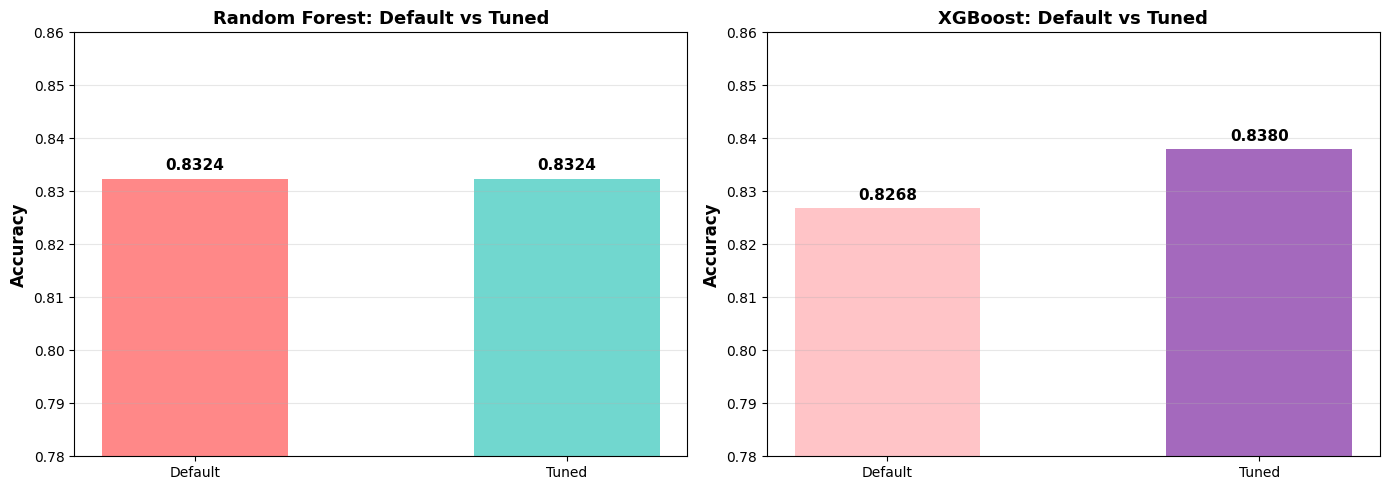

In [101]:
# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RF Comparison
ax1 = axes[0]
rf_data = [rf_acc, acc_rf_tuned]
colors_rf = ['#FF6B6B', '#4ECDC4']
bars1 = ax1.bar(['Default', 'Tuned'], rf_data, color=colors_rf, width=0.5, alpha=0.8)
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Random Forest: Default vs Tuned', fontsize=13, fontweight='bold')
ax1.set_ylim([0.78, 0.86])
ax1.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# XGB Comparison
ax2 = axes[1]
xgb_data = [acc_xgb, acc_xgb_tuned]
colors_xgb = ['#FFB6B9', '#8E44AD']
bars2 = ax2.bar(['Default', 'Tuned'], xgb_data, color=colors_xgb, width=0.5, alpha=0.8)
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('XGBoost: Default vs Tuned', fontsize=13, fontweight='bold')
ax2.set_ylim([0.78, 0.86])
ax2.grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()



---
# ✅ Final Summary

**What we've built:**
- End-to-end Titanic ML pipeline with 7 models
- Proper evaluation (accuracy + classification report)
- Feature importance for Random Forest
- Hyperparameter tuning for Random Forest and XGBoost
- Before/after tuning comparison visuals

**Key takeaways:**
- Simpler models (Logistic Regression) can win when features are strong
- Tree ensembles (Random Forest / XGBoost) are powerful but need tuning
- Scaling matters for KNN and SVM
- Hyperparameter tuning typically adds 1–3% accuracy
